In [1]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [38]:
from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [39]:
nums = get_dir_nums(log_dir='../models/model-logs')
print(nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]


In [40]:
ret = get_tbls('basicexp', nums, log_dir='../models/model-logs')

d_metrics, d_resid, d_params = ret

In [41]:
tmp  = d_metrics.join(d_params[['_test_path']], 
                      on='exp_name', 
                      how='left',)

In [42]:
test_accs2 = tmp.groupby([ '_test_path','exp_name',]).agg(
                                ['max'])['test_accuracy']

##### expbuilder-4: baseline of resnet34 with crop style

In [43]:
cmp_param = '_condition_name'

In [44]:
# defaults for easy test
exps_default = d_params.iloc[12:14,:].index ; exps_default

Index(['basicexp-12', 'basicexp-13'], dtype='object')

In [45]:
exps_diff = d_params[d_params['_expdesign_name'].isin(
                                ['baseline34_tune20','baseline50_tune20'])
                    ].index
exps_diff

Index(['basicexp-45', 'basicexp-46', 'basicexp-47', 'basicexp-48',
       'basicexp-49', 'basicexp-50', 'basicexp-51', 'basicexp-52',
       'basicexp-53'],
      dtype='object')

In [46]:
exps_all = exps_default.to_list() 
exps_all += exps_diff.to_list()

In [47]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_test_name            2
_model_arch           2
_fine_tune_epochs     2
_train_seed           3
_custom_crop          2
model_fn             11
_expdesign_name       3
_condition_name       4
dtype: int64

In [48]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [49]:
exp_metrics['exp_name'].unique()

array(['basicexp-12', 'basicexp-13', 'basicexp-45', 'basicexp-46',
       'basicexp-47', 'basicexp-48', 'basicexp-49', 'basicexp-50',
       'basicexp-51', 'basicexp-52', 'basicexp-53'], dtype=object)

In [50]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [51]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

[nan 'pad' 'topcrop' 'croptop']


In [52]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

In [53]:
color_ind

nan          blue
pad        orange
topcrop       red
croptop     green
dtype: object

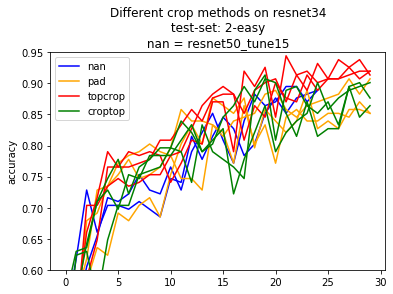

In [54]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Different crop methods on resnet34\n test-set: 2-easy \n nan = resnet50_tune15 ')
plt.ylabel('accuracy')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.6, .95]);